In [151]:
# 공항별 운행 정보 분석
# 우리나라 사람 대부분이 인천, 김해, 김포 공항을 이용한다 
# ->그럼 다른 공항은 있으나 마나한 정도일까? 아님 단지 규모의 차이일까?
# 1. 항공기 운행수당 여객의 이용률을 통해 규모 대비 이용률을 산출한다
# 2. 공항이 있는 도시 또는 주변 도시의 인구수를 산출해서 인원수 대비 항공기 운행수를 산출한다
# 3.항공기 운행은 여객선을 기준으로 산출한다.

# 결론-> 위 정보를 토대로 계산해도 인천공항이 높다--> 어떤 차이떄문에?
        # 아님 다른 공항도 충분히 규모만큼 운영되고 있다

#사용한 데이터:
# https://www.airport.co.kr/www/cms/frFlightStatsCon/airportStats.do?MENU_ID=1250#none (한국공항공사)
# https://kosis.kr/search/search.do (국가통계포털)

In [152]:
# [1] 모듈 불러오기
import pandas as pd                     #데이터프레임 관리
import matplotlib.pyplot as plt             #데이터 시각화
from matplotlib import font_manager as fm
from matplotlib import rc                   #폰트 관리

In [153]:
# +++ 폰트 불러오기
font_file=r'C:\Windows\Fonts\batang.ttc'

# 폰트 패밀리
font_name= fm.FontProperties(fname=font_file).get_name()

# 새로운 폰트 패밀리 이름 지정
rc('font', family=font_name)


In [154]:
# [2] 데이터 불러오기
file_2019= '공항별_2019.xlsx'
file_2020= '공항별_2020.xlsx'
file_2021= '공항별_2021.xlsx'
file_2022= '공항별_2022.xlsx'
file_2023= '공항별_2023.xlsx'
DF_2020= pd.read_excel('공항별_2020.xlsx')
DF_2021= pd.read_excel('공항별_2021.xlsx')
DF_2022= pd.read_excel('공항별_2022.xlsx')
DF_2023= pd.read_excel('공항별_2023.xlsx')
DF_2019= pd.read_excel('공항별_2019.xlsx')

In [155]:
# [3] 데이터 전처리
DF_list= [DF_2019, DF_2020, DF_2021, DF_2022, DF_2023]
DF_2019

,Unnamed: 0,Unnamed: 1,Unnamed: 2,공항별 통계,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,검색 기간,2019.01~2019.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,공항 구분,전체,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,노선 구분,전체,운항 구분,전체,여객화물 구분,전체,여객 구분,전체,화물 구분,전체
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,공항명,운항(편),NaN,NaN,여객(명),NaN,NaN,화물(톤),NaN,NaN
6,NaN,도착,출발,계,도착,출발,계,도착,출발,계
7,김포,"70,192","70,230","140,422","12,759,118","12,689,298","25,448,416","122,511.2","130,884","253,395.1"
8,김해,"55,604","55,672","111,276","8,464,178","8,466,845","16,931,023","83,955.9","87,997.4","171,953.3"
9,제주,"87,669","87,697","175,366","15,657,540","15,658,854","31,316,394","121,197.4","137,649.1","258,846.5"


In [156]:
DF_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20 non-null     object
 1   Unnamed: 1  21 non-null     object
 2   Unnamed: 2  18 non-null     object
 3   공항별 통계      18 non-null     object
 4   Unnamed: 4  19 non-null     object
 5   Unnamed: 5  18 non-null     object
 6   Unnamed: 6  18 non-null     object
 7   Unnamed: 7  19 non-null     object
 8   Unnamed: 8  18 non-null     object
 9   Unnamed: 9  18 non-null     object
dtypes: object(10)
memory usage: 1.9+ KB


In [157]:
"""
# 1. 필요없는 행, 열 삭제
# 행-> 0,1,2,3,4,5,6   / 열-> 1,2,4,5,7,8
DF_2019.drop(index=[0,1,2,3,4,5,6], inplace=True)
DF_2019.drop(columns=['Unnamed: 1', 'Unnamed: 2','Unnamed: 4',
       'Unnamed: 5','Unnamed: 7', 'Unnamed: 8' ], inplace=True)

# 2. 컬럼명 변경
DF_2019.columns=['', '운항(편)', '여객(명)', '화물(톤)']

# 3. 숫자 데이터로 변경 
DF_2019['여객(명)']= DF_2019['여객(명)'].str.replace(',','').astype(int)
DF_2019['운항(편)']= DF_2019['운항(편)'].str.replace(',','').astype(int)

#4. 공항을 인덱스로 설정
DF_2019.set_index(DF_2019[''], inplace=True)
DF_2019.drop(columns='', inplace=True)


"""

# 

"\n# 1. 필요없는 행, 열 삭제\n# 행-> 0,1,2,3,4,5,6   / 열-> 1,2,4,5,7,8\nDF_2019.drop(index=[0,1,2,3,4,5,6], inplace=True)\nDF_2019.drop(columns=['Unnamed: 1', 'Unnamed: 2','Unnamed: 4',\n       'Unnamed: 5','Unnamed: 7', 'Unnamed: 8' ], inplace=True)\n\n# 2. 컬럼명 변경\nDF_2019.columns=['', '운항(편)', '여객(명)', '화물(톤)']\n\n# 3. 숫자 데이터로 변경 \nDF_2019['여객(명)']= DF_2019['여객(명)'].str.replace(',','').astype(int)\nDF_2019['운항(편)']= DF_2019['운항(편)'].str.replace(',','').astype(int)\n\n#4. 공항을 인덱스로 설정\nDF_2019.set_index(DF_2019[''], inplace=True)\nDF_2019.drop(columns='', inplace=True)\n\n\n"

In [158]:
DF_list= [DF_2019, DF_2020, DF_2021, DF_2022, DF_2023]
# 반복문 돌리기
for list in DF_list:
    list.drop(index=[0,1,2,3,4,5,6], inplace=True)
    
    list.drop(columns=['Unnamed: 1', 'Unnamed: 2','Unnamed: 4',
       'Unnamed: 5','Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9' ], inplace=True)
    
    list.columns=['', '운항(편)', '여객(명)']

    list['여객(명)']= list['여객(명)'].str.replace(',','').astype(int)
    list['운항(편)']= list['운항(편)'].str.replace(',','').astype(int)

    list.set_index(list[''], inplace=True)
    list.drop(columns='', inplace=True)


In [159]:
for list in DF_list:
    print(list.head())

     운항(편)     여객(명)
                    
김포  140422  25448416
김해  111276  16931023
제주  175366  31316394
대구   31236   4669057
광주   13297   2026651
     운항(편)     여객(명)
                    
김포  113580  17446239
김해   53150   7235652
제주  138256  21054696
대구   12990   1749396
광주   13575   1726483
     운항(편)     여객(명)
                    
김포  138855  22525417
김해   57694   8859304
제주  160230  25802550
대구   13294   2048365
광주   14764   2152892
     운항(편)     여객(명)
                    
김포  143713  24524065
김해   61733  10027097
제주  169624  29703662
대구   13472   2255883
광주   12916   2068625
     운항(편)     여객(명)
                    
김포  134560  23424158
김해   82185  13694710
제주  167086  29096271
대구   20244   3302107
광주   13277   2050378


In [160]:
# 결측치 확인
for list in DF_list:
    print(list.isna().sum())
    print(list.duplicated().sum(), end='\n\n')
# 결측치, 중복치 없음 

운항(편)    0
여객(명)    0
dtype: int64
0

운항(편)    0
여객(명)    0
dtype: int64
0

운항(편)    0
여객(명)    0
dtype: int64
0

운항(편)    0
여객(명)    0
dtype: int64
0

운항(편)    0
여객(명)    0
dtype: int64
0



In [161]:
# [4] 데이터 분석
# 1. 항공기 운행수당 여객의 이용률을 통해 규모 대비 이용률 산출



In [162]:
#운행편당 여객 이용수 컬럼 추가 및 추가된 컬럼을 기준으로 오름차순 정렬 
for list in DF_list:
    list['운항편수당 이용고객 수']= list['여객(명)']/list['운항(편)']
    list.sort_values(by='운항편수당 이용고객 수', ascending=True, inplace=True)
    print(list.head(3))

      운항(편)   여객(명)  운항편수당 이용고객 수
                                 
포항경주   1162   93769     80.696213
사천     1937  219289    113.210635
울산     6612  786739    118.986540
       운항(편)     여객(명)  운항편수당 이용고객 수
                                    
포항경주     838     65994     78.751790
인천    149982  12049851     80.341981
사천       320     27433     85.728125
       운항(편)    여객(명)  운항편수당 이용고객 수
                                   
인천    131027  3198909     24.414121
사천         2      105     52.500000
포항경주    1868   158927     85.078694
       운항(편)     여객(명)  운항편수당 이용고객 수
                                    
포항경주    2514    249413     99.209626
사천      1350    139657    103.449630
인천    171253  17869759    104.347130
      운항(편)   여객(명)  운항편수당 이용고객 수
                                 
포항경주   2053  253703    123.576717
사천     1490  189778    127.367785
울산     2982  380511    127.602616


In [163]:
DF_2022N

,운항(편),여객(명),운항편수당 이용고객 수
,,,
광주,12916,2068625,160.159879
군산,2681,409738,152.830287
김포,143713,24524065,170.646114
김해,61733,10027097,162.426854
대구,13472,2255883,167.449748
무안,192,29394,153.093750
사천,1350,139657,103.449630
양양,2981,384642,129.031198
여수,7072,1010333,142.863829


In [209]:

#합계를 제외한 리스트 생성
DF_2019N=DF_2019.copy(); DF_2020N=DF_2020.copy(); DF_2021N=DF_2021.copy();DF_2022N=DF_2022.copy()
DF_2023N=DF_2023.copy()
DF_list_N= [DF_2019N, DF_2020N, DF_2021N, DF_2022N, DF_2023N]
for list in DF_list_N:
    list.drop(index='합계', inplace=True)
    list.sort_index(axis=0, inplace=True)
    list['color']=['#FF0000', '#0054FF', '#3DB7CC', '#000000', '#FFE400',
                    '#FFB2D9', '#5D1037', '#005766', '#662500','#FFD9EC',
                    '#5F00FF', '#F29661',  '#FFFFCD', '#004A00', '#BDBDBD'
                   ]

In [165]:
# list['color']=['red', 'blue', 'black', 'green', '#FFE400',
#                     '#FFB2D9', '#5D1037', '#005766', '#662500','#FFD9EC',
#                     '#5F00FF', '#F29661',  '#FFFFCD', '#004A00', '#BDBDBD'
#                    ]

In [210]:
DF_2019N

,운항(편),여객(명),운항편수당 이용고객 수,color
,,,,
광주,13297,2026651,152.414154,#FF0000
군산,1955,306518,156.786701,#0054FF
김포,140422,25448416,181.228127,#3DB7CC
김해,111276,16931023,152.153411,#000000
대구,31236,4669057,149.476790,#FFE400
무안,6585,895410,135.977221,#FFB2D9
사천,1937,219289,113.210635,#5D1037
양양,435,54283,124.788506,#005766
여수,5002,635637,127.076569,#662500


Text(0.5, 1.0, '2019-여객수/운행수')

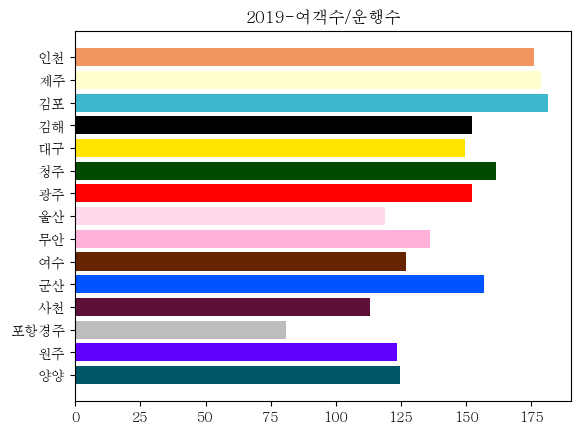

In [212]:
# plt.barh(DF_2019N.index, DF_2019N['운항편수당 이용고객 수'], color = DF_2019N['color'] )
# plt.title('2019-여객수/운행수')


In [214]:
DF_2019N.sort_values('운항편수당 이용고객 수', ascending=False)

,운항(편),여객(명),운항편수당 이용고객 수,color
,,,,
김포,140422,25448416,181.228127,#3DB7CC
제주,175366,31316394,178.577341,#FFFFCD
인천,404104,71169722,176.117341,#F29661
청주,18648,3009051,161.360521,#004A00
군산,1955,306518,156.786701,#0054FF
광주,13297,2026651,152.414154,#FF0000
김해,111276,16931023,152.153411,#000000
대구,31236,4669057,149.476790,#FFE400
무안,6585,895410,135.977221,#FFB2D9


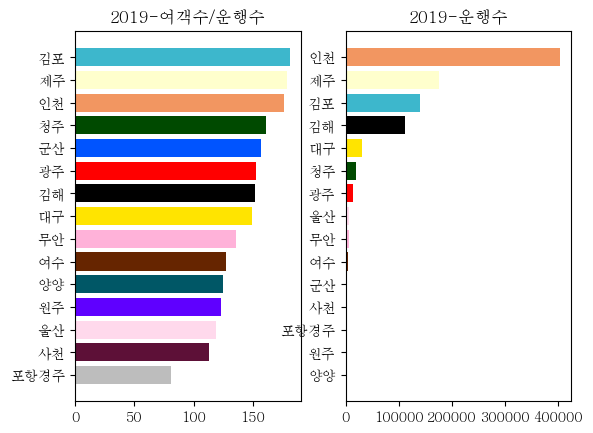

In [216]:
#2019
fig19= plt.figure()
ax1=fig19.add_subplot(1,2, 1)
for list in DF_list_N:
    list.sort_values(by= '운항편수당 이용고객 수', inplace=True)

ax1.barh(DF_2019N.index, DF_2019N['운항편수당 이용고객 수'], color = DF_2019N['color'] )
ax1.set_title('2019-여객수/운행수')

for list in DF_list_N:
    list.sort_values(by= '운항(편)', inplace=True)

ax2=fig19.add_subplot(1,2, 2)
ax2.barh(DF_2019N.index, DF_2019N['운항(편)'],color = DF_2019N['color'])
ax2.set_title('2019-운행수')
plt.show()

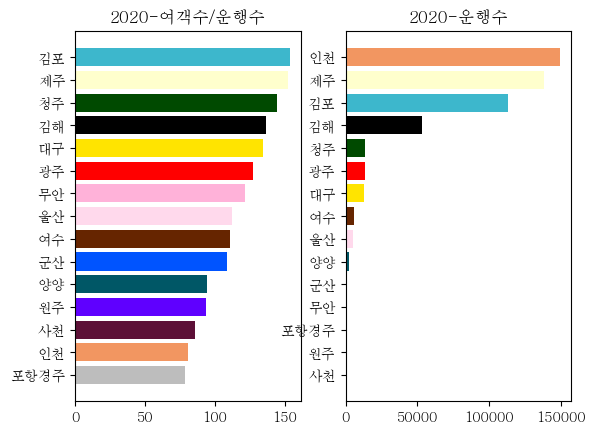

In [221]:
#2020
fig20= plt.figure()
ax1=fig20.add_subplot(1,2, 1)
for list in DF_list_N:
    list.sort_values(by= '운항편수당 이용고객 수', inplace=True)

ax1.barh(DF_2020N.index, DF_2020N['운항편수당 이용고객 수'],color = DF_2020N['color'])
ax1.set_title('2020-여객수/운행수')

for list in DF_list_N:
    list.sort_values(by= '운항(편)', inplace=True)
ax2=fig20.add_subplot(1,2, 2)

ax2.barh(DF_2020N.index, DF_2020N['운항(편)'],color = DF_2020N['color'])
ax2.set_title('2020-운행수')
plt.show()

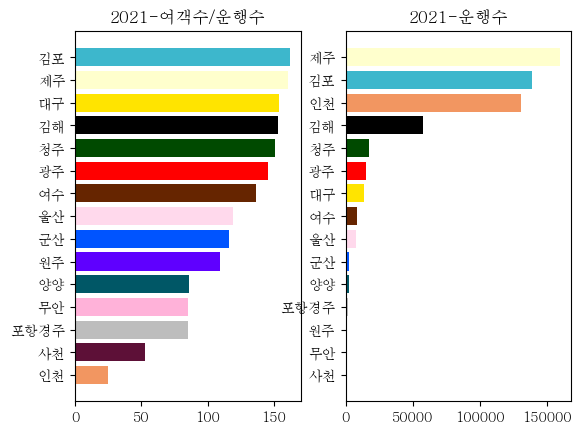

In [224]:
#2021
fig21= plt.figure()
ax1=fig21.add_subplot(1,2, 1)
for list in DF_list_N:
    list.sort_values(by= '운항편수당 이용고객 수', inplace=True)

ax1.barh(DF_2021N.index, DF_2021N['운항편수당 이용고객 수'],color = DF_2021N['color'])
ax1.set_title('2021-여객수/운행수')

for list in DF_list_N:
    list.sort_values(by= '운항(편)', inplace=True)
ax2=fig21.add_subplot(1,2, 2)

ax2.barh(DF_2021N.index, DF_2021N['운항(편)'],color = DF_2021N['color'])
ax2.set_title('2021-운행수')
plt.show()


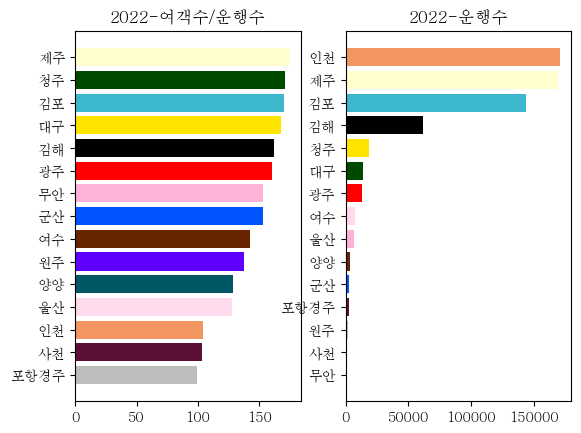

In [225]:
#2022
fig22= plt.figure()
ax1=fig22.add_subplot(1,2, 1)
for list in DF_list_N:
    list.sort_values(by= '운항편수당 이용고객 수', inplace=True)

ax1.barh(DF_2022N.index, DF_2022N['운항편수당 이용고객 수'],color = DF_2022N['color'])
ax1.set_title('2022-여객수/운행수')

for list in DF_list_N:
    list.sort_values(by= '운항(편)', inplace=True)
ax2=fig22.add_subplot(1,2, 2)

ax2.barh(DF_2022N.index, DF_2022N['운항(편)'],color = DF_2019N['color'])
ax2.set_title('2022-운행수')
plt.show()

In [170]:
DF_2023['운항편수당 이용고객 수']


포항경주    123.576717
사천      127.367785
울산      127.602616
양양      128.830495
여수      133.618198
원주      148.860769
군산      153.860320
광주      154.430820
무안      157.235175
대구      163.115343
청주      163.915909
인천      166.413372
김해      166.632719
합계      168.368406
김포      174.079652
제주      174.139491
Name: 운항편수당 이용고객 수, dtype: float64

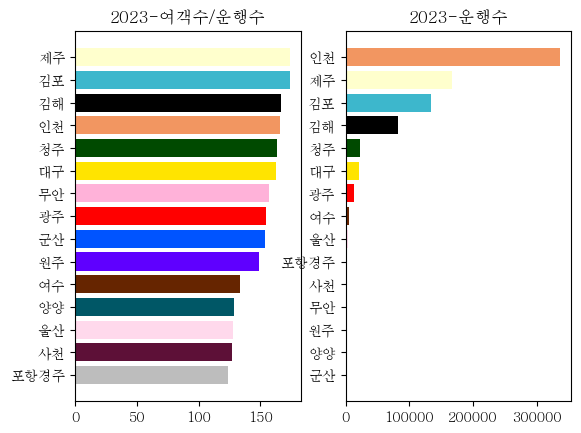

In [227]:
#2023
fig23= plt.figure()
ax1=fig23.add_subplot(1,2, 1)
for list in DF_list_N:
    list.sort_values(by= '운항편수당 이용고객 수', inplace=True)

ax1.barh(DF_2023N.index, DF_2023N['운항편수당 이용고객 수'],color = DF_2023N['color'])
ax1.set_title('2023-여객수/운행수')

for list in DF_list_N:
    list.sort_values(by= '운항(편)', inplace=True)
ax2=fig23.add_subplot(1,2, 2)
ax2.barh(DF_2023N.index, DF_2023N['운항(편)'],color = DF_2023N['color'])
ax2.set_title('2023-운행수')
plt.show()

-인천
 *코로나 사태+ 면세점 철수 문로 인해 코로나 기간 중 이용규모가 감소함

In [172]:
# [2] 주변 도시의 인구수 대비 운행수 시각화

In [173]:
# 데이터 불러오기
file_age= '인구수.csv'
ageDF= pd.read_csv(file_age)

In [174]:
ageDF.info()
print(ageDF)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   행정구역별(읍면동)  13 non-null     object
 1   2019        13 non-null     object
 2   2020        13 non-null     object
 3   2021        13 non-null     object
 4   2022        13 non-null     object
dtypes: object(5)
memory usage: 648.0+ bytes
    행정구역별(읍면동)      2019      2020      2021      2022
0   행정구역별(읍면동)   총인구 (명)   총인구 (명)   총인구 (명)   총인구 (명)
1           전국  51779203  51829136  51738071  51692272
2        대구광역시   2429940   2410700   2387911   2366852
3        인천광역시   2952237   2945454   2957044   2989125
4        광주광역시   1489730   1477573   1475262   1468972
5        울산광역시   1143692   1135423   1120753   1110516
6          경기도  13300900  13511676  13652529  13717827
7         충청북도   1629343   1632088   1624764   1624993
8         전라북도   1807423   1802766   1787053   1774248
9         전라남도   178754

In [175]:
# 데이터 전처리
# 1. 0번행 제거
# 2. 인덱스 설정 시도(시도에 있는 공항 이름)


In [176]:
# 0번행 제거
ageDF.drop(0, inplace=True)
ageDF_N=ageDF.drop(1)
ageDF_N

,행정구역별(읍면동),2019,2020,2021,2022
2,대구광역시,2429940,2410700,2387911,2366852
3,인천광역시,2952237,2945454,2957044,2989125
4,광주광역시,1489730,1477573,1475262,1468972
5,울산광역시,1143692,1135423,1120753,1110516
6,경기도,13300900,13511676,13652529,13717827
7,충청북도,1629343,1632088,1624764,1624993
8,전라북도,1807423,1802766,1787053,1774248
9,전라남도,1787543,1788807,1778124,1771431
10,경상북도,2668154,2644757,2635314,2620373
11,경상남도,3347209,3333056,3305931,3280829


In [177]:
# 인덱스 설정 및 행정구역별 열 삭제 
ageDF_N['범주']=[ '대구(대구)', '인천(인천)', '광주(광주)', '울산(울산)', '경기(김포)',
                   '충북(청주)', '전북(군산)', '전남(무안,여수)', '경북(포항)', '경남(김해, 사천)',
                   '제주(제주)']
ageDF_N.set_index('범주', inplace=True)
ageDF_N.drop(['행정구역별(읍면동)'],axis=1, inplace=True)




In [178]:
ageDF_N.sort_index()

,2019,2020,2021,2022
범주,,,,
경기(김포),13300900,13511676,13652529,13717827
"경남(김해, 사천)",3347209,3333056,3305931,3280829
경북(포항),2668154,2644757,2635314,2620373
광주(광주),1489730,1477573,1475262,1468972
대구(대구),2429940,2410700,2387911,2366852
울산(울산),1143692,1135423,1120753,1110516
인천(인천),2952237,2945454,2957044,2989125
"전남(무안,여수)",1787543,1788807,1778124,1771431
전북(군산),1807423,1802766,1787053,1774248


In [179]:
# 운행편수를 연도별로 병합
DF_2019['운항(편)'].sort_index()


광주       13297
군산        1955
김포      140422
김해      111276
대구       31236
무안        6585
사천        1937
양양         435
여수        5002
울산        6612
원주         904
인천      404104
제주      175366
청주       18648
포항경주      1162
합계      918941
Name: 운항(편), dtype: int32

In [180]:
# 시도별 인구수/운행편수

In [181]:
file=('인구수_여객수.xlsx')
DF= pd.read_excel(file)
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   공항명       15 non-null     object
 1   2019(인구)  15 non-null     int64 
 2   2019(여객)  15 non-null     int64 
 3   2020(인구)  15 non-null     object
 4   2020(여객)  15 non-null     int64 
 5   2021(인구)  15 non-null     object
 6   2021(여객)  15 non-null     int64 
 7   2022(인구)  15 non-null     object
 8   2022(여객)  15 non-null     int64 
 9   2023(인구)  15 non-null     object
 10  2023(여객)  15 non-null     int64 
dtypes: int64(6), object(5)
memory usage: 1.4+ KB


In [182]:
DF.set_index('공항명', drop=True, inplace=True)

In [183]:
DF

,2019(인구),2019(여객),2020(인구),2020(여객),2021(인구),2021(여객),2022(인구),2022(여객),2023(인구),2023(여객)
공항명,,,,,,,,,,
광주,1489730,2026651,1477573,1726483,1475262,2152892,1468972,2068625,1419237,23424158
군산,1807423,306518,1802766,109800,1787053,280197,1774248,409738,1754757,13694710
김포,1787543,25448416,1788807,17446239,1778124,22525417,1771431,24524065,1804217,29096271
김해,2952237,16931023,2945454,7235652,2957044,8859304,2989125,10027097,2997410,3302107
대구,665048,4669057,670858,1749396,673107,2048365,676375,2255883,675252,2050378
무안,2429940,895410,2410700,112938,2387911,7529,2366852,29394,2374960,233337
사천,13300900,219289,13511676,27433,13652529,105,13717827,139657,13630821,3695812
양양,1541502,54283,1542840,238748,1538492,204052,1536498,384642,1527807,158848
여수,3347209,635637,3333056,646884,3305931,1115699,3280829,1010333,3251158,599144


In [184]:
alist=DF.columns[2:]
alist

Index(['2020(인구)', '2020(여객)', '2021(인구)', '2021(여객)', '2022(인구)', '2022(여객)',
       '2023(인구)', '2023(여객)'],
      dtype='object')

In [185]:
for list in alist:    DF[list]=DF[list].astype(int)

In [186]:
for list in DF_list_N:
    list.sort_index(axis=0, ascending=True, inplace=True)
    print(list.head(3))


     운항(편)     여객(명)  운항편수당 이용고객 수  color
                                         
광주   13297   2026651    152.414154    red
군산    1955    306518    156.786701   blue
김포  140422  25448416    181.228127  black
     운항(편)     여객(명)  운항편수당 이용고객 수  color
                                         
광주   13575   1726483    127.181068    red
군산    1012    109800    108.498024   blue
김포  113580  17446239    153.603090  black
     운항(편)     여객(명)  운항편수당 이용고객 수  color
                                         
광주   14764   2152892    145.820374    red
군산    2404    280197    116.554493   blue
김포  138855  22525417    162.222585  black
     운항(편)     여객(명)  운항편수당 이용고객 수  color
                                         
광주   12916   2068625    160.159879    red
군산    2681    409738    152.830287   blue
김포  143713  24524065    170.646114  black
     운항(편)     여객(명)  운항편수당 이용고객 수  color
                                         
광주   13277   2050378    154.430820    red
군산    1124    172939    153.860320

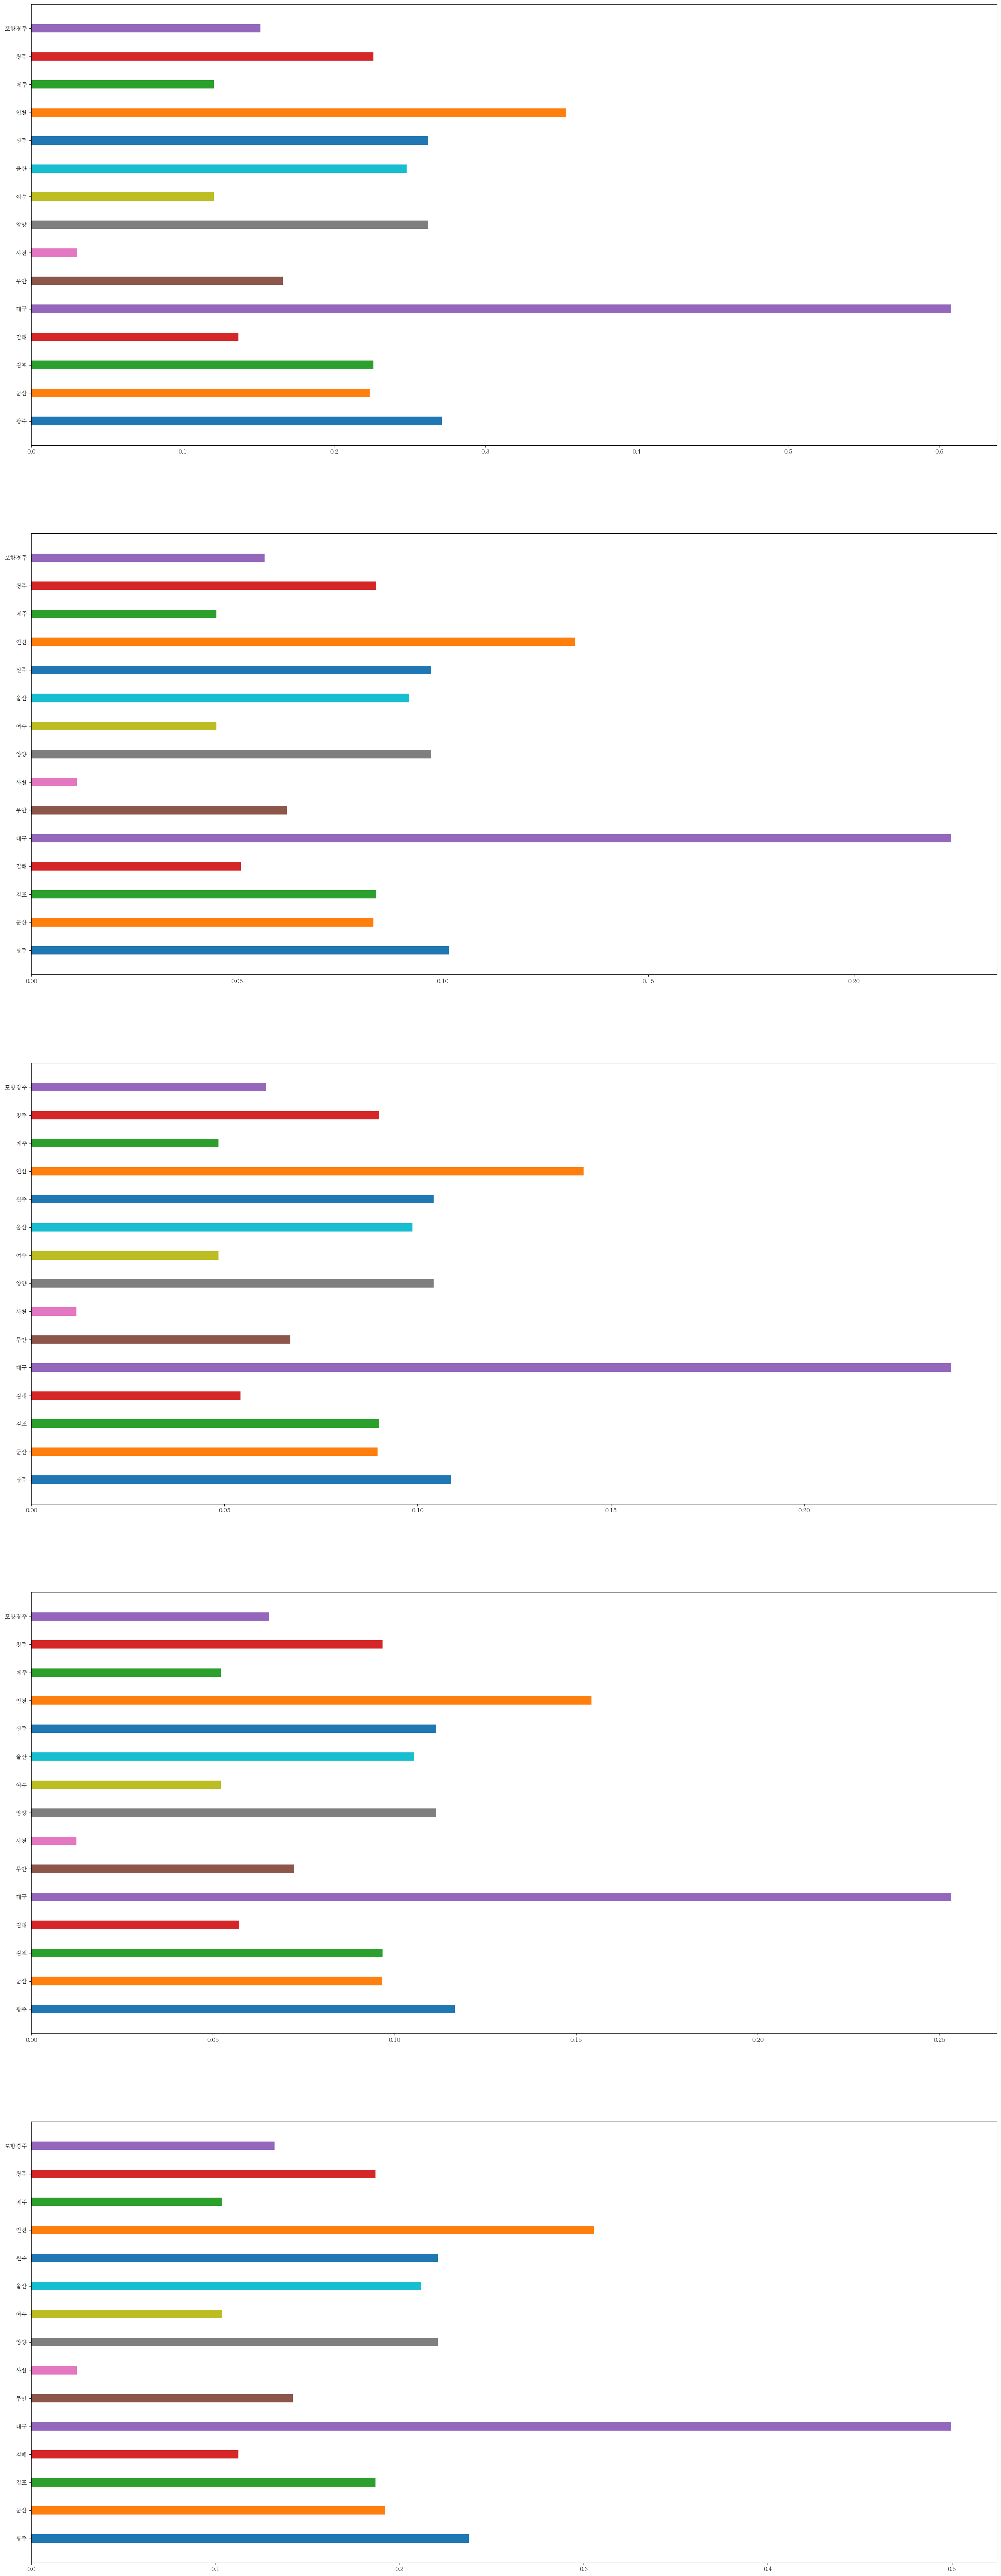

In [187]:
# 운행편수당 지역인구  이용률
fig_people=plt.figure(figsize=(30,80))

#2019
ax1=fig_people.add_subplot(5,1, 1)

ax1.barh(idx, DF_2019N['운항(편)']/DF['2019(인구)'], height=0.3,color = DF_2019N['color'])

#2020
ax2=fig_people.add_subplot(5,1, 2)
for idx in DF.index.to_list()[:]:
    ax2.barh(idx, DF_2020N['운항(편)']/DF.loc[idx]['2020(인구)'], height=0.3,label=idx)

#2021
ax3=fig_people.add_subplot(5,1, 3)
for idx in DF.index.to_list()[:]:
    ax3.barh(idx, DF_2021N['운항(편)']/DF.loc[idx]['2021(인구)'], height=0.3,label=idx)

#2022
ax4=fig_people.add_subplot(5,1, 4)
for idx in DF.index.to_list()[:]:
    ax4.barh(idx, DF_2022N['운항(편)']/DF.loc[idx]['2022(인구)'], height=0.3,label=idx)
    
#2023
ax5=fig_people.add_subplot(5,1, 5)
for idx in DF.index.to_list()[:]:
    ax5.barh(idx, DF_2023N['운항(편)']/DF.loc[idx]['2023(인구)'], height=0.3,label=idx)


plt.show()


In [231]:
DF.sort_index(axis=0, inplace=True)
DF['color']=['#FF0000', '#0054FF', '#3DB7CC', '#000000', '#FFE400',
                    '#FFB2D9', '#5D1037', '#005766', '#662500','#FFD9EC',
                    '#5F00FF', '#F29661',  '#FFFFCD', '#004A00', '#BDBDBD'
                   ]

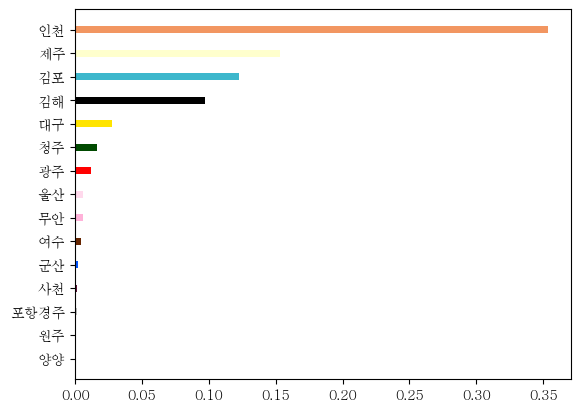

In [232]:
#2019
DF['2019']= DF_2019N['운항(편)']/DF.loc[idx]['2019(인구)']
DF.sort_values(by='2019', ascending=True, inplace=True)

for idx in DF.index.to_list()[:]:
    plt.barh(DF.index, DF['2019'], height=0.3,color= DF['color'])

<BarContainer object of 15 artists>

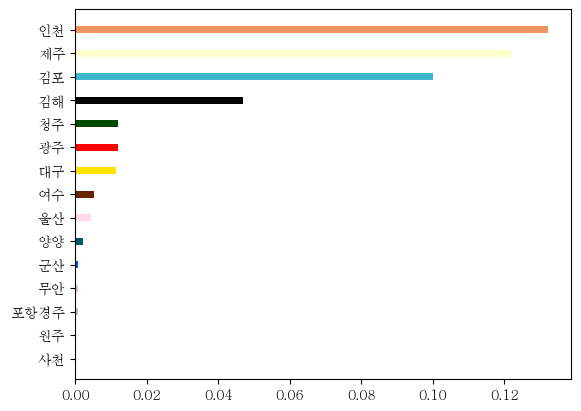

In [234]:
#2020
DF['2020']= DF_2020N['운항(편)']/DF.loc[idx]['2020(인구)']
DF.sort_values(by='2020', ascending=True, inplace=True)


plt.barh(DF.index, DF['2020'], height=0.3,color= DF['color'])

<BarContainer object of 15 artists>

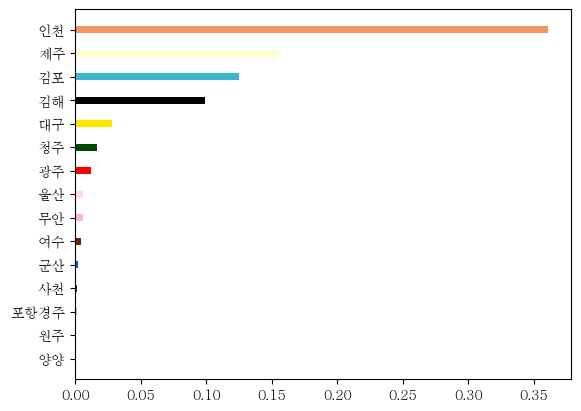

In [235]:
#2021

DF['2021']= DF_2019N['운항(편)']/DF.loc[idx]['2021(인구)']
DF.sort_values(by='2021', ascending=True, inplace=True)

plt.barh(DF.index, DF['2021'], height=0.3,color= DF['color'])

<BarContainer object of 15 artists>

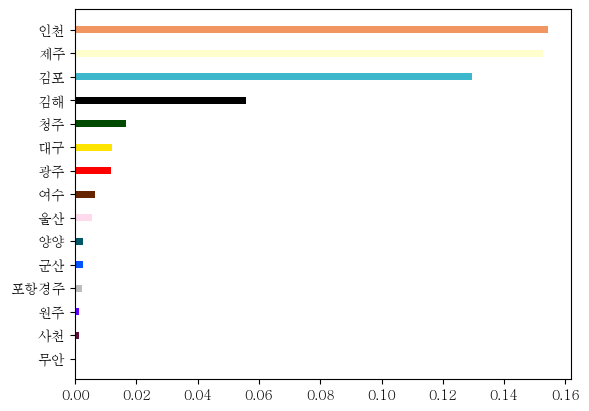

In [236]:
#2022

DF['2022']= DF_2022N['운항(편)']/DF.loc[idx]['2022(인구)']
DF.sort_values(by='2022', ascending=True, inplace=True)

plt.barh(DF.index, DF['2022'], height=0.3,color= DF['color'])

<BarContainer object of 15 artists>

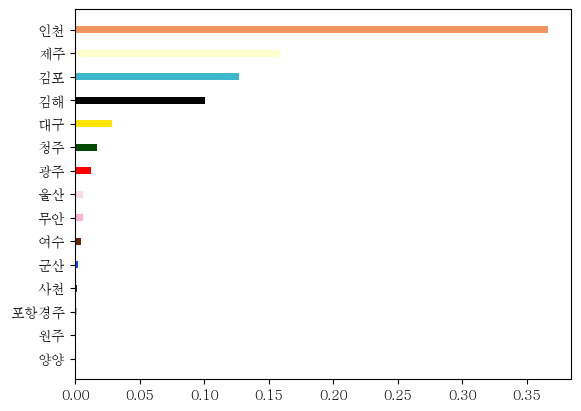

In [237]:
#2023

DF['2023']= DF_2019N['운항(편)']/DF.loc[idx]['2023(인구)']
DF.sort_values(by='2023', ascending=True, inplace=True)


plt.barh(DF.index, DF['2023'], height=0.3,color= DF['color'])


In [193]:
# DF['2019']= DF_2019N['운항(편)']/DF.loc[idx]['2019(인구)']
# DF.sort_values(by='2019', ascending=True, inplace=True)
# DF

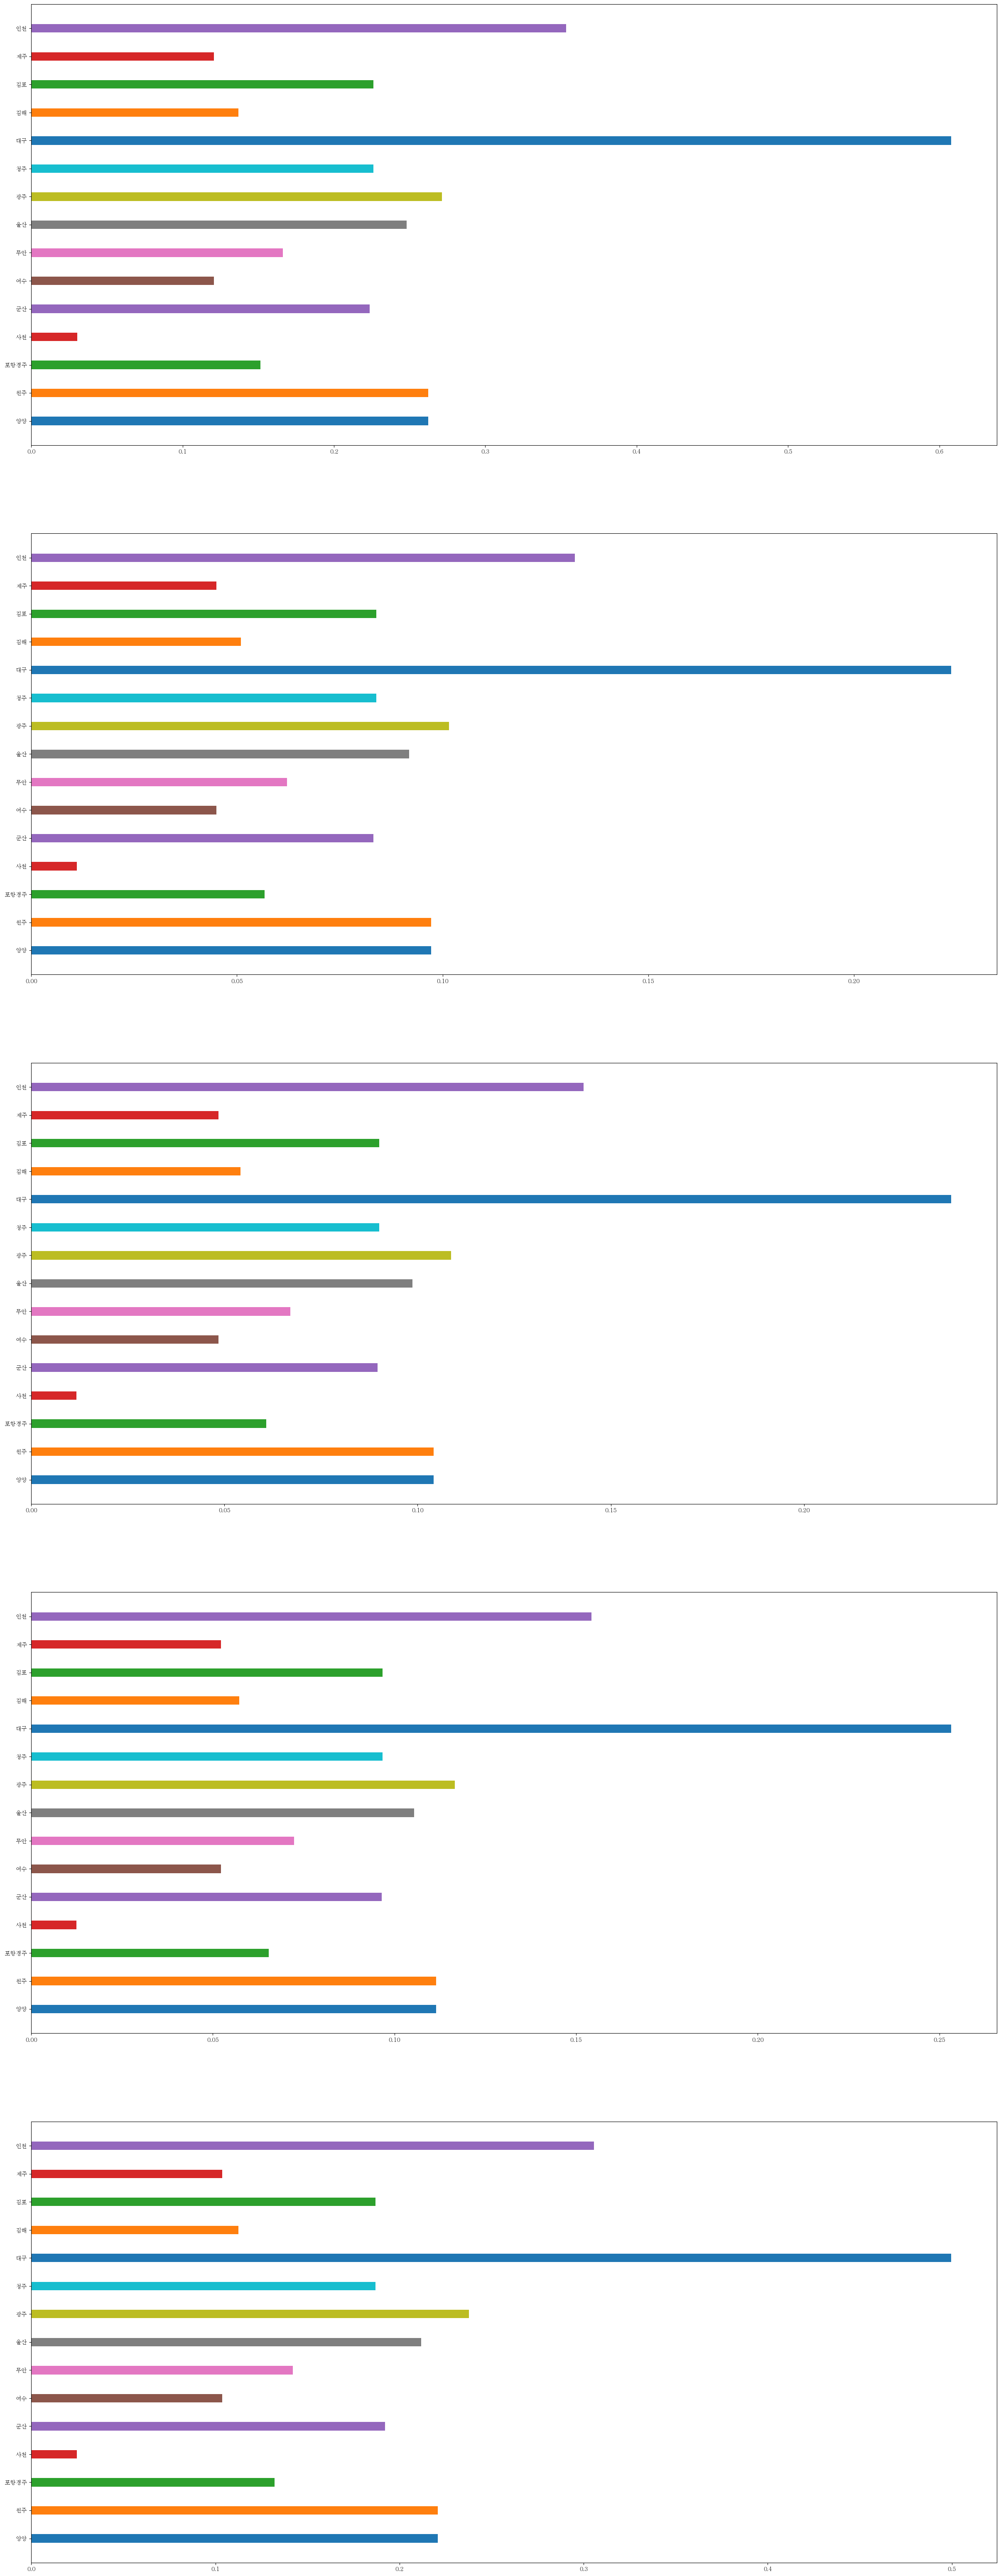

In [194]:
# 운행편수당 지역인구  이용률
fig_people=plt.figure(figsize=(30,80))

#2019
ax1=fig_people.add_subplot(5,1, 1)
for idx in DF.index.to_list()[:]:
    DF['2019']= DF_2019N['운항(편)']/DF.loc[idx]['2019(인구)']
    ax1.barh(idx, DF_2019N['운항(편)']/DF.loc[idx]['2019(인구)'], height=0.3,label=idx)

#2020
ax2=fig_people.add_subplot(5,1, 2)
for idx in DF.index.to_list()[:]:
    ax2.barh(idx, DF_2020N['운항(편)']/DF.loc[idx]['2020(인구)'], height=0.3,label=idx)

#2021
ax3=fig_people.add_subplot(5,1, 3)
for idx in DF.index.to_list()[:]:
    ax3.barh(idx, DF_2021N['운항(편)']/DF.loc[idx]['2021(인구)'], height=0.3,label=idx)

#2022
ax4=fig_people.add_subplot(5,1, 4)
for idx in DF.index.to_list()[:]:
    ax4.barh(idx, DF_2022N['운항(편)']/DF.loc[idx]['2022(인구)'], height=0.3,label=idx)
    
#2023
ax5=fig_people.add_subplot(5,1, 5)
for idx in DF.index.to_list()[:]:
    ax5.barh(idx, DF_2023N['운항(편)']/DF.loc[idx]['2023(인구)'], height=0.3,label=idx)


plt.show()


In [195]:
# 코로나 특수성 때문에 값을 비교하는게 의미가 크지 않다
# 공항 규모를 감안하더라도 규모의 경제, 접근성 등으로 인해 큰 공항의 이용률이 전체적으로 높은 것으로 나타났다

-------------------------


In [196]:
#인구수당 여객 수

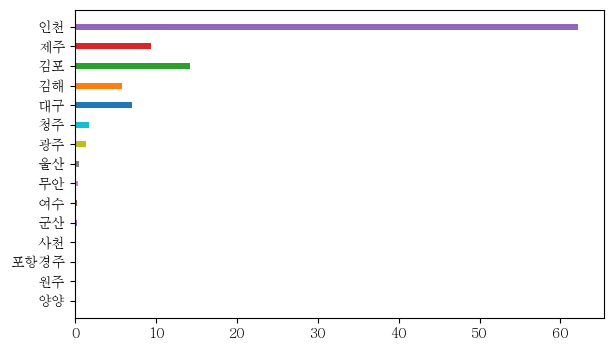

In [197]:
#2019
fig1=plt.figure(figsize=(15,4))
ax1=fig1.add_subplot(1,2, 1)
for idx in DF.index.to_list()[:]:
    ax1.barh(idx, DF.loc[idx]['2019(여객)']/DF.loc[idx]['2019(인구)'], height=0.3,label=idx)

# ax2=fig1.add_subplot(1,2, 2)
# for idx in DF.index.to_list()[:]:
#     DF.loc[idx].sort_index()
#     ax2.barh(idx, DF.loc[idx]['2019(여객)'], height=0.3,label=idx)

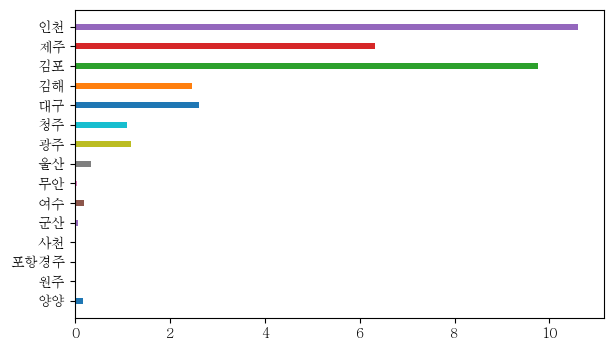

In [198]:
#2020
fig2=plt.figure(figsize=(15,4))
ax1=fig2.add_subplot(1,2, 1)
for idx in DF.index.to_list()[:]:
    DF.loc[idx].sort_index()
    ax1.barh(idx, DF.loc[idx]['2020(여객)']/DF.loc[idx]['2020(인구)'], height=0.3,label=idx)

# ax2=fig2.add_subplot(1,2, 2)
# for idx in DF.index.to_list()[:]:
#     DF.loc[idx].sort_index()
#     ax2.barh(idx, DF.loc[idx]['2020(여객)'], height=0.3,label=idx)

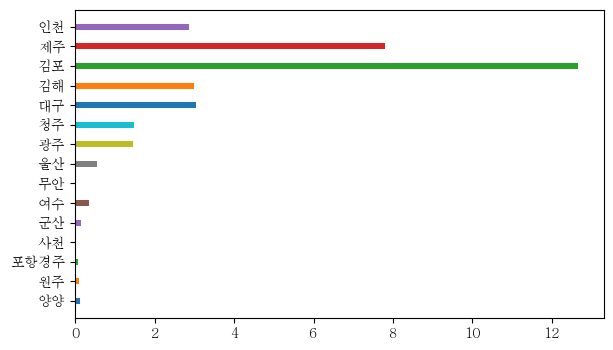

In [199]:
#2021
fig3=plt.figure(figsize=(15,4))
ax1=fig3.add_subplot(1,2, 1)
for idx in DF.index.to_list()[:]:
    DF.loc[idx].sort_index()
    ax1.barh(idx, DF.loc[idx]['2021(여객)']/DF.loc[idx]['2021(인구)'], height=0.3,label=idx)

# ax2=fig3.add_subplot(1,2, 2)
# for idx in DF.index.to_list()[:]:
#     DF.loc[idx].sort_index()
#     ax2.barh(idx, DF.loc[idx]['2021(여객)'], height=0.3,label=idx)

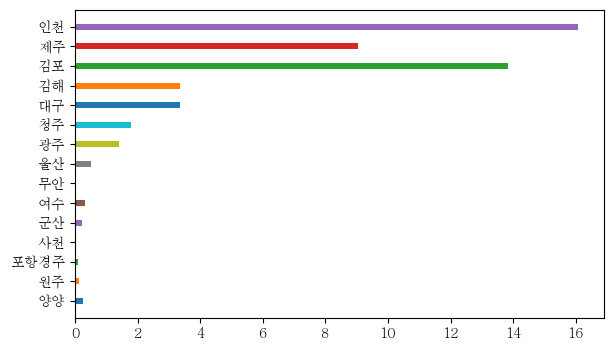

In [200]:
#2022
fig4=plt.figure(figsize=(15,4))
ax1=fig4.add_subplot(1,2, 1)
for idx in DF.index.to_list()[:]:
    DF.loc[idx].sort_index()
    ax1.barh(idx, DF.loc[idx]['2022(여객)']/DF.loc[idx]['2022(인구)'], height=0.3,label=idx)

# ax2=fig4.add_subplot(1,2, 2)
# for idx in DF.index.to_list()[:]:
#     DF.loc[idx].sort_index()
#     ax2.barh(idx, DF.loc[idx]['2022(여객)'], height=0.3,label=idx)

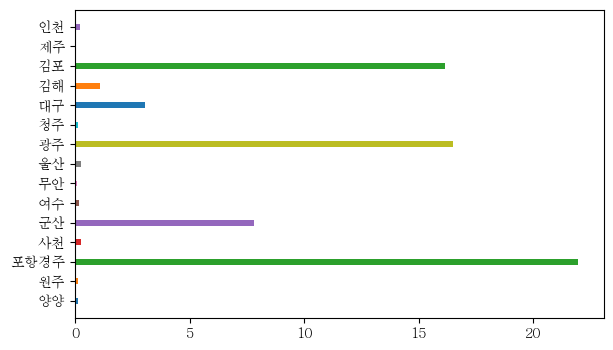

In [201]:
#2023
fig5=plt.figure(figsize=(15,4))
ax1=fig5.add_subplot(1,2, 1)
for idx in DF.index.to_list()[:]:
    DF.loc[idx].sort_index()
    ax1.barh(idx, DF.loc[idx]['2023(여객)']/DF.loc[idx]['2023(인구)'], height=0.3,label=idx)

# ax2=fig5.add_subplot(1,2, 2)
# for idx in DF.index.to_list()[:]:
#     DF.loc[idx].sort_index()
#     ax2.barh(idx, DF.loc[idx]['2023(여객)'], height=0.3,label=idx)